In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/world_gdp/DP_LIVE_18072020130646266.csv')

df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')
df.set_index('TIME', inplace=True)

df = df.loc['1970':]

# look at per capita numbers
# df = df[df['MEASURE'] == 'USD_CAP']
df = df[df['MEASURE'] == 'MLN_USD']

# cleanup
df.drop(columns=['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], inplace=True)
locations = df['LOCATION'].unique()


# Calculate benchmark
bchmk = df.groupby('TIME').mean()
bchmk['LOCATION'] = 'BCHMK'
# df = pd.concat([df, bchmk], sort=True)

# add % change
bchmk['ret'] = bchmk['Value'].pct_change()
df['ret'] = df['Value'].pct_change()
bchmk.dropna(inplace=True)
df.dropna(inplace=True)

In [3]:
estimation_window = 9
years = df.index.drop_duplicates()[:-1]
horizon = len(years)

countries = ['USA', 'AUS', 'GRC', 'CHN', 'GBR', 'BRA']
alpha_t = np.empty((horizon - estimation_window, len(countries)))
beta_t = np.empty((horizon - estimation_window, len(countries)))
index = []
tt = []
for i, t in enumerate(range(estimation_window, horizon)):
    start = str(years[t-estimation_window].year)
    end = str(years[t].year)
    df_t = df.loc[start:end]
    bchmk_t = bchmk.loc[start:end]
    
    Z = np.hstack((np.ones((estimation_window + 1, 1)), bchmk_t['ret'].to_numpy().reshape(-1, 1)))
    X = df_t.pivot(columns='LOCATION', values='ret').bfill().ffill().to_numpy()
    res = np.linalg.lstsq(Z, X)
    alphaBeta = pd.DataFrame(res[0], index = ['Alpha', 'Beta'], columns=df_t['LOCATION'].drop_duplicates().to_list()) 
    tt.append(end)

    for j, country in enumerate(countries):
        try:
            alpha_t[i, j] = alphaBeta[country].loc['Alpha']
            beta_t[i, j] = alphaBeta[country].loc['Beta']
        except:
            alpha_t[i, j] = None
            beta_t[i, j] = None
    
alpha_t = pd.DataFrame(data=alpha_t, index=tt, columns=countries)
beta_t = pd.DataFrame(data=beta_t, index=tt, columns=countries)
alpha_t = alpha_t.loc['1994':]
beta_t = beta_t.loc['1994':]

/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [4]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(11, 5), nrows=1, ncols=1)
    alpha_t.plot(ax=ax)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


with sns.axes_style('whitegrid'):
    for country in countries:
        fig, ax = plt.subplots(figsize=(11, 5), nrows=1, ncols=1)
        alpha_t[country].plot(ax=ax)
        ax.set_title(country)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


<Figure size 1100x500 with 1 Axes>

<Figure size 1100x500 with 1 Axes>

<Figure size 1100x500 with 1 Axes>

<Figure size 1100x500 with 1 Axes>

<Figure size 1100x500 with 1 Axes>

<Figure size 1100x500 with 1 Axes>

<Figure size 1100x500 with 1 Axes>

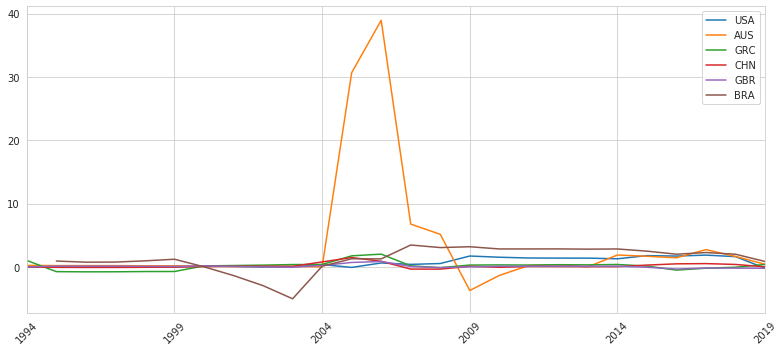

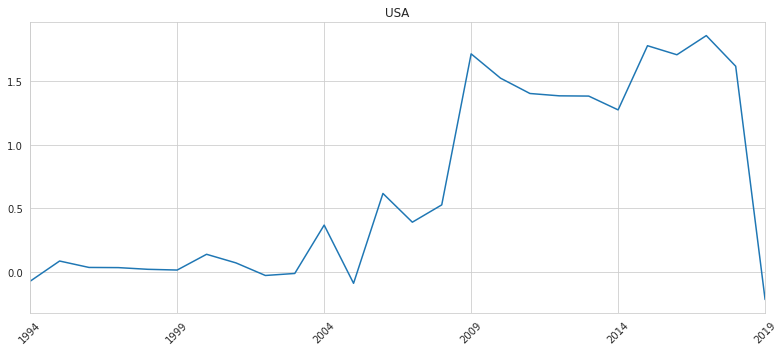

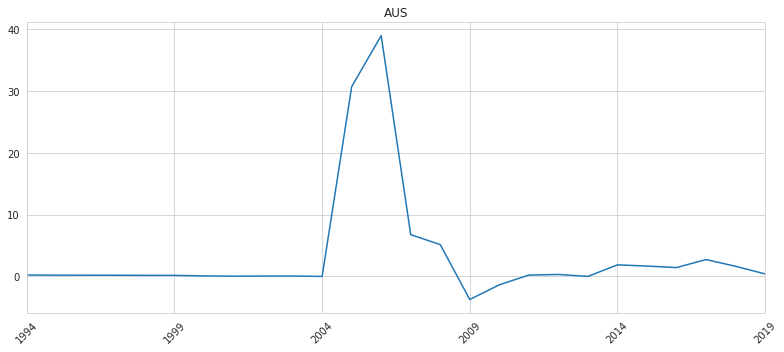

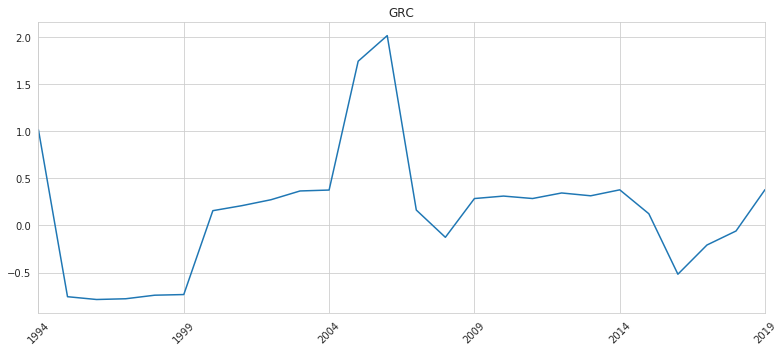

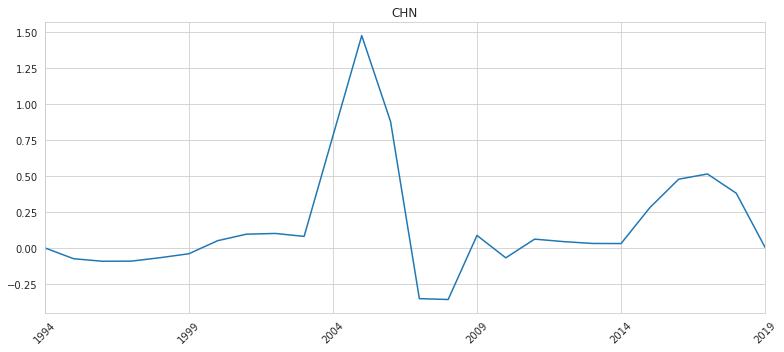

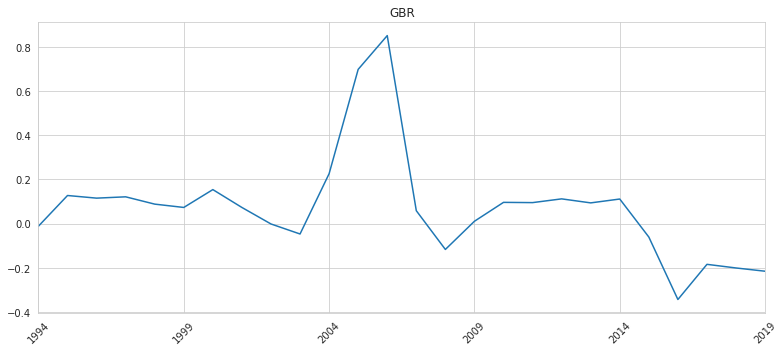

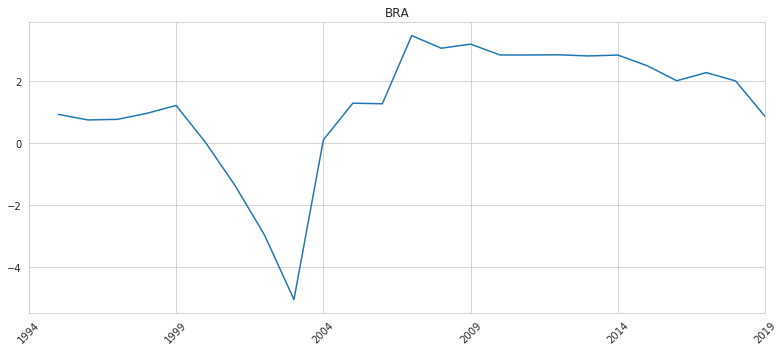

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(11, 5), nrows=1, ncols=1)
    beta_t.plot(ax=ax)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


with sns.axes_style('whitegrid'):
    for country in countries:
        fig, ax = plt.subplots(figsize=(11, 5), nrows=1, ncols=1)
        beta_t[country].plot(ax=ax)
        ax.set_title(country)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [6]:
alpha_t

,USA,AUS,GRC,CHN,GBR,BRA
1994,0.093187,0.048976,-0.610116,0.057473,0.125072,NaN
1995,0.071588,0.047334,0.149680,0.089206,0.077873,-0.197580
1996,0.081667,0.047211,0.148952,0.091056,0.080857,-0.147769
1997,0.086152,0.045176,0.144492,0.086991,0.079939,-0.105704
1998,0.090034,0.044967,0.132144,0.084157,0.076145,-0.071482
1999,0.089373,0.046589,0.117977,0.083217,0.077476,-0.040782
2000,0.082763,0.053708,0.038603,0.080291,0.068701,-0.315606
2001,0.041905,0.058745,0.032300,0.031292,0.090594,-0.138853
2002,0.052592,0.056486,0.025026,0.030178,0.099595,0.059434
2003,0.048864,0.055469,0.015679,0.031753,0.102151,0.295758
